In [3]:
import pandas as pd
import seaborn as sns

students_df = pd.read_csv("StudentsPerformance.csv")
students_df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
students_df.describe()
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
students_df["gender"] = l_encoder.fit_transform(students_df["gender"])

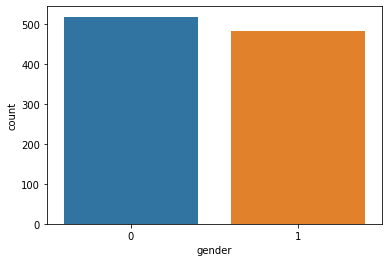

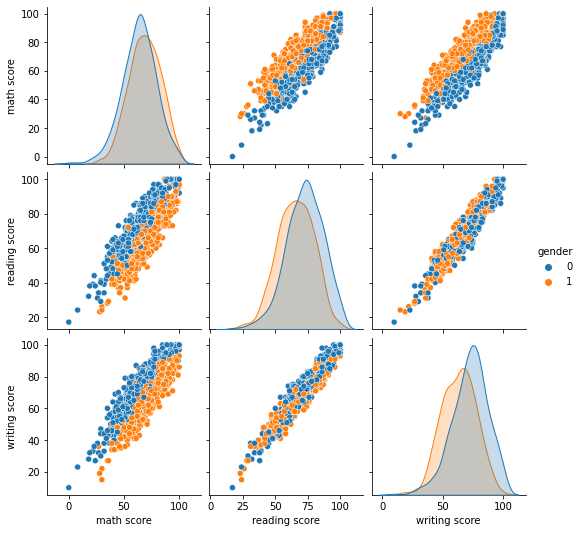

In [15]:
sns.countplot(x=students_df["gender"])
sns.pairplot(students_df, hue="gender", vars=["math score","reading score","writing score"])

In [19]:
from sklearn.model_selection import train_test_split

X = students_df[["math score","reading score","writing score"]]
y = students_df["gender"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X,y)

0.935

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

y_test_prediction = model.predict(X_test)
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       157
           1       0.78      0.81      0.79       143

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



In [29]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
model2.score(X,y)

y_test_prediction2 = model2.predict(X_test)
print(classification_report(y_test, y_test_prediction2))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       157
           1       0.84      0.88      0.86       143

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



<AxesSubplot:>

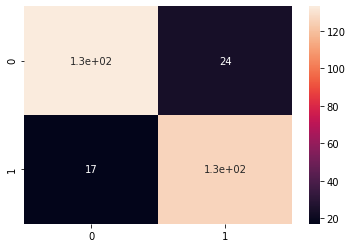

In [30]:
cm = confusion_matrix(y_test, y_test_prediction2)
sns.heatmap(cm, annot=True)